In [1]:
import math
import numpy as np
import openslide
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
PATH_TO_DATASET = "/deep/group/aihc-bootcamp-fall2021/lymphoma/Guatemala Lymphoma AI Project"
PATH_TO_IMAGES = PATH_TO_DATASET + "/Image Data Files"
PATH_TO_ANNOTATIONS_CSV = PATH_TO_DATASET + "/Annotations_CSV"
NUM_SAMPLES = 5

In [13]:
# Generated annotations file from 1010900_TMA1_annotated.qpdata.
PATH_TO_TMA1_ANNOTATION = PATH_TO_ANNOTATIONS_CSV + "/1010900_TMA1_annotations.csv"
PATH_TO_TMA1_IMAGE = PATH_TO_IMAGES + "/1010900_TMA1.svs"

## Read and Show a Single Tissue Core from TMA1

In [6]:
tma1 = openslide.OpenSlide(PATH_TO_TMA1_IMAGE)

In [7]:
# These values are obtained from 1010900_TMA1_annotated.qpdata.
x = 13046
y = 6695
width = 2699
height = 2813

In [8]:
patch = tma1.read_region([x, y], 0, [width, height]).convert('RGB')

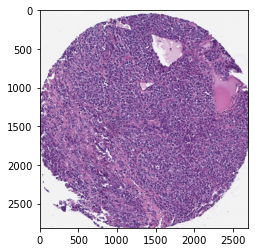

In [14]:
plt.imshow(patch)

## Read All Tissue Cores in TMA1 

In [15]:
tma1_annotations = pd.read_csv(PATH_TO_TMA1_ANNOTATION)

In [16]:
tma1_annotations.head()

,X,Y,Width,Height
0,35527.0,32320.0,2768.0,2766.0
1,16097.0,19081.0,2573.0,2433.0
2,12476.0,10688.0,2671.0,2647.0
3,31386.0,35225.0,2470.0,2343.0
4,19254.0,31320.0,2741.0,2240.0


In [17]:
# Store 'num_images_to_read' tissue cores in tma1_patches.
num_images_to_read = 10
tma1_patches = []
tma1 = openslide.OpenSlide(PATH_TO_TMA1_IMAGE)
for index, row in tma1_annotations.iterrows():
    if index > num_images_to_read:
        break
    x, y, width, height = int(row["X"]), int(row["Y"]), int(row["Width"]), int(row["Height"])
    patch = tma1.read_region([x, y], 0, [width, height]).convert('RGB')
    tma1_patches.append(patch)

In [18]:
def plot_samples(patches, num_samples=NUM_SAMPLES):
    if num_samples > len(patches):
        raise ValueError("Can not plot more samples than the number of patches there are.")
        
    indices = np.arange(len(patches))
    np.random.shuffle(indices)
    
    for i in range(num_samples):
        ii = indices[i]
        plt.imshow(patches[ii])
        plt.show()

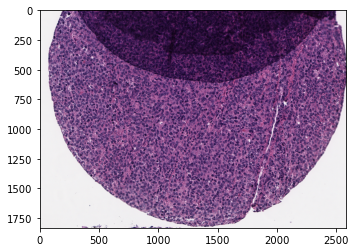

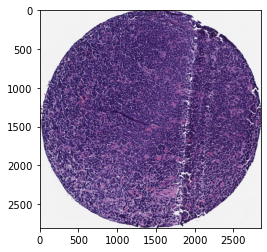

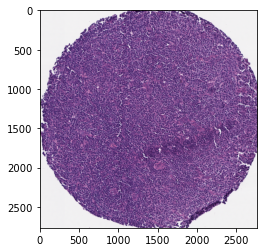

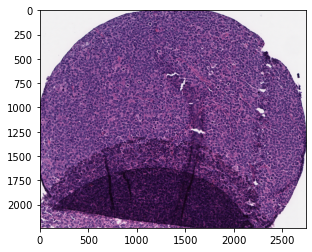

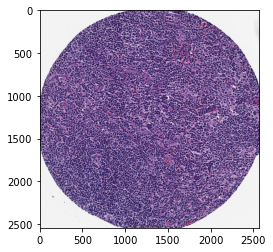

In [19]:
plot_samples(tma1_patches)